# FUNDING/ COUNTRY/ YEAR SITUATION

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
!pwd

/Users/sahra-nesta/Desktop/h2020_project/creative_nation/notebooks/h2020_revised_analysis


In [3]:
# !pwd
# from topic modelling
topic_df = pd.read_csv("../../data/project_cluster.csv")
# from official data source
df = pd.read_csv("../../data/h2020_final_df.csv")

In [4]:
#abstract tokens' values representing each project's weighting significance within a topic - (taking the highest weighting) 
topic_df['top_topic'] = topic_df.iloc[:,1:].apply(lambda x: x.idxmax(),axis=1)

In [30]:
# topic counts 
topic_df['top_topic'].value_counts()

tc_manufacturing_process_efficiency    2874
tc_generic_terminology                 1565
tc_genetics                            1171
tc_culture_development                 1167
tc_materials                           1074
tc_data                                 733
tc_health_tech                          655
tc_energy                               300
tc_computational_methods                275
tc_biology_evolutionary                 230
tc_neuroscience_cognitive_science       215
tc_smes                                 173
tc_bio_chemistry                        163
tc_medical                              161
tc_infrastructure                        62
tc_climate_marine                        56
tc_nanotech                              50
tc_social_policy                         42
tc_transport                             27
tc_industrial_internet                   23
tc_generic_academic_activities           15
tc_recycling                             13
tc_robotics                     

## Concatenate H2020 dataframe with Topics dataframe assigning each column with its top topic (as per weighting)

In [6]:
#concatenated to make new dataframe with topics assigned

topics = topic_df[['top_topic']]
clean_up = pd.concat([df, topics], axis = 1)
clean_up

,Unnamed: 0,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,...,participantCountries,subjects,name,broadTopic,subTopic,topic_identity,topic_identifier,clean_topic_identifier,call_identifier,top_topic
0,0,196706,673348,LCODA,SIGNED,H2020-EU.2.3.1.;H2020-EU.3.4.,IT-1-2014-1,H2020,Electronic scanning MIMO Radar for railway lev...,2015-06-01,...,NaN,NaN,DEDICATED SME INSTRUMENT,INDUSTRIAL LEADERSHIP,Innovation in SMEs,IT,IT,IT,SMEINST,tc_infrastructure
1,1,196709,660362,PASS,SIGNED,H2020-EU.1.3.2.,MSCA-IF-2014-EF,H2020,Paleozoic Seafloor Spreading,2015-09-04,...,NaN,NaN,Marie Skłodowska-Curie Actions,EXCELLENT SCIENCE,MARIE SKLODOWSKA-CURIE ACTIONS,MSCA,MSCA,MSCA,MSCA,tc_data
2,2,196694,672521,HyPoGA,SIGNED,H2020-EU.2.3.1.;H2020-EU.3.4.,IT-1-2014-1,H2020,Feasibility study of a superefficient hybrid p...,2015-05-01,...,DE,NaN,DEDICATED SME INSTRUMENT,INDUSTRIAL LEADERSHIP,Innovation in SMEs,IT,IT,IT,SMEINST,tc_manufacturing_process_efficiency
3,3,196693,672228,PARK-IT,SIGNED,H2020-EU.2.3.1.;H2020-EU.2.1.1.,ICT-37-2014-1,H2020,"Unobtrusive, continuous and quantitative asses...",2015-06-01,...,NaN,NaN,Information and Communication Technologies,INDUSTRIAL LEADERSHIP,Leadership in enabling and industrial technolo...,ICT,ICT,ICT,SMEINST,tc_infrastructure
4,4,196679,640627,DOS,SIGNED,H2020-EU.1.1.,ERC-StG-2014,H2020,Domestic Servants in Colonial South Asia,2015-10-01,...,DE;UK,NaN,EUROPEAN RESEARCH COUNCIL,EXCELLENT SCIENCE,EUROPEAN RESEARCH COUNCIL,ERC,ERC,ERC,ERC,tc_culture_development
5,5,196708,654933,3Dconvert,SIGNED,H2020-EU.1.3.2.,MSCA-IF-2014-EF,H2020,The dynamics of the mammalian epigenome during...,2015-05-01,...,NaN,NaN,Marie Skłodowska-Curie Actions,EXCELLENT SCIENCE,MARIE SKLODOWSKA-CURIE ACTIONS,MSCA,MSCA,MSCA,MSCA,tc_genetics
6,6,196678,639633,MASSIVE,SIGNED,H2020-EU.1.1.,ERC-StG-2014,H2020,"Multinationals, Institutions and Innovation in...",2015-06-01,...,NaN,NaN,EUROPEAN RESEARCH COUNCIL,EXCELLENT SCIENCE,EUROPEAN RESEARCH COUNCIL,ERC,ERC,ERC,ERC,tc_culture_development
7,7,196692,672199,ImplantFreeSpine,SIGNED,H2020-EU.2.3.1.;H2020-EU.3.1.,PHC-12-2014-1,H2020,World’s first complete motion-preservation 'Im...,2015-06-01,...,NaN,NaN,PERSONALISING HEALTH AND CARE,SOCIETAL CHALLENGES,"Health, demographic change and wellbeing",PHC,PHC,PHC,SMEINST,tc_health_tech
8,8,196659,674710,CLOUD-VAS,SIGNED,H2020-EU.2.3.1.;H2020-EU.3.4.,IT-1-2014,H2020,Cloud based Vessel Allocation Decision Support...,2015-06-01,...,NaN,NaN,DEDICATED SME INSTRUMENT,INDUSTRIAL LEADERSHIP,Innovation in SMEs,IT,IT,IT,SMEINST,tc_manufacturing_process_efficiency
9,9,196691,671980,RAd,SIGNED,H2020-EU.2.3.1.;H2020-EU.2.1.1.,ICT-37-2014-1,H2020,RAd (Responsible Advertising) - An innovative ...,2015-06-01,...,NaN,NaN,Information and Communication Technologies,INDUSTRIAL LEADERSHIP,Leadership in enabling and industrial technolo...,ICT,ICT,ICT,SMEINST,tc_culture_development


# Converting the str to int (year)

In [7]:
# convert year from string to int and split for the hyphen and only take the first element
def mod_strings(date_str):
    try:
        return int(date_str.split('-')[0])
    except (AttributeError, IndexError):  # in case value is not as 
                                          # expected returning original value as in this case there are NaN
        return date_str

clean_up.startDate = clean_up.startDate.apply(mod_strings)
clean_up.endDate = clean_up.endDate.apply(mod_strings)

In [8]:
clean_up[['coordinatorCountry', 'totalCost', 'startDate', 'top_topic']]

,coordinatorCountry,totalCost,startDate,top_topic
0,UK,71429.00,2015.0,tc_infrastructure
1,UK,183454.80,2015.0,tc_data
2,DE,71429.00,2015.0,tc_manufacturing_process_efficiency
3,ES,71429.00,2015.0,tc_infrastructure
4,DE,899849.00,2015.0,tc_culture_development
5,ES,158121.60,2015.0,tc_genetics
6,UK,1276880.00,2015.0,tc_culture_development
7,UK,71429.00,2015.0,tc_health_tech
8,TR,1803125.00,2015.0,tc_manufacturing_process_efficiency
9,NO,71429.00,2015.0,tc_culture_development


## Funding through years 

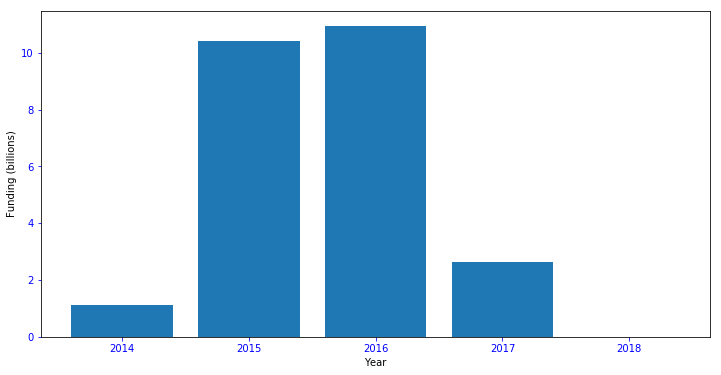

In [9]:
# funding throughout years

years = []
costs = []

for year, grouped in clean_up.groupby("startDate"):
    years.append(year)
    costs.append(grouped["totalCost"].sum()/1e9)
    my_colors = 'rgbky'
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(years,costs)


ax.tick_params(axis='x', colors='blue') 
ax.tick_params(axis='y', colors='blue')
ax.set_xlabel("Year")
ax.set_ylabel("Funding (billions)")


years = []
costs = []

data = []

##### Groupby Country

for year,grouped in clean_up.groupby("startDate"):
    data.append({"startDate":year,"totalCost":cost,"coordinatorCountry":country})
    years.append(year)
    costs.append(grouped["totalCost"].sum()/1e9)

_df = pd.DataFrame(data)
    
fig,ax = plt.subplots(figsize=(12,6))  
ax.bar(years,costs)

ax.set_xlabel("Year")
ax.set_ylabel("Something [billions]")

###### Year Cost Country

## Funding per Country

In [10]:
# country vs funding
country_year = clean_up[['coordinatorCountry', 'totalCost']]


In [11]:
# grouped country vs funding / 1^9 for billion
y = country_year.groupby(['coordinatorCountry']).sum()/1e9
y

,totalCost
coordinatorCountry,
AI,0.000071
AM,0.000009
AT,0.980269
BA,0.000367
BE,1.267980
BG,0.010934
CH,0.600208
CY,0.054622
CZ,0.059888


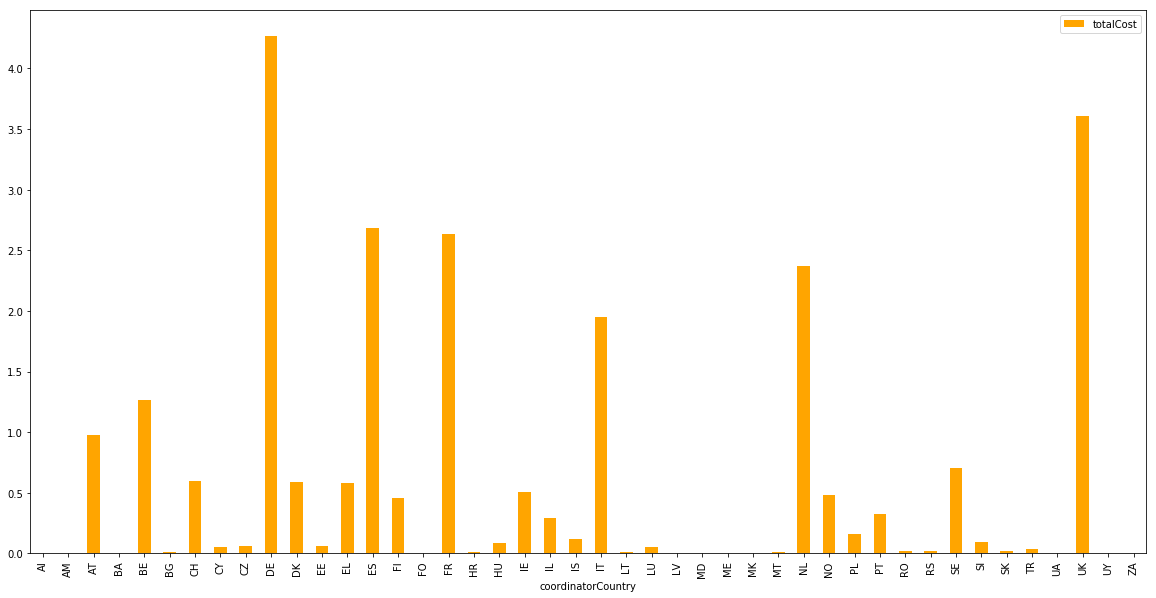

In [12]:
#plot for country vs funding 

y.plot.bar(figsize = (20,10), color = "orange")




## Funding per Country per Year 

In [13]:
# specific columns isolated
country_year_cost = clean_up[['coordinatorCountry', 'totalCost', 'startDate']]
country_year_cost

,coordinatorCountry,totalCost,startDate
0,UK,71429.00,2015.0
1,UK,183454.80,2015.0
2,DE,71429.00,2015.0
3,ES,71429.00,2015.0
4,DE,899849.00,2015.0
5,ES,158121.60,2015.0
6,UK,1276880.00,2015.0
7,UK,71429.00,2015.0
8,TR,1803125.00,2015.0
9,NO,71429.00,2015.0


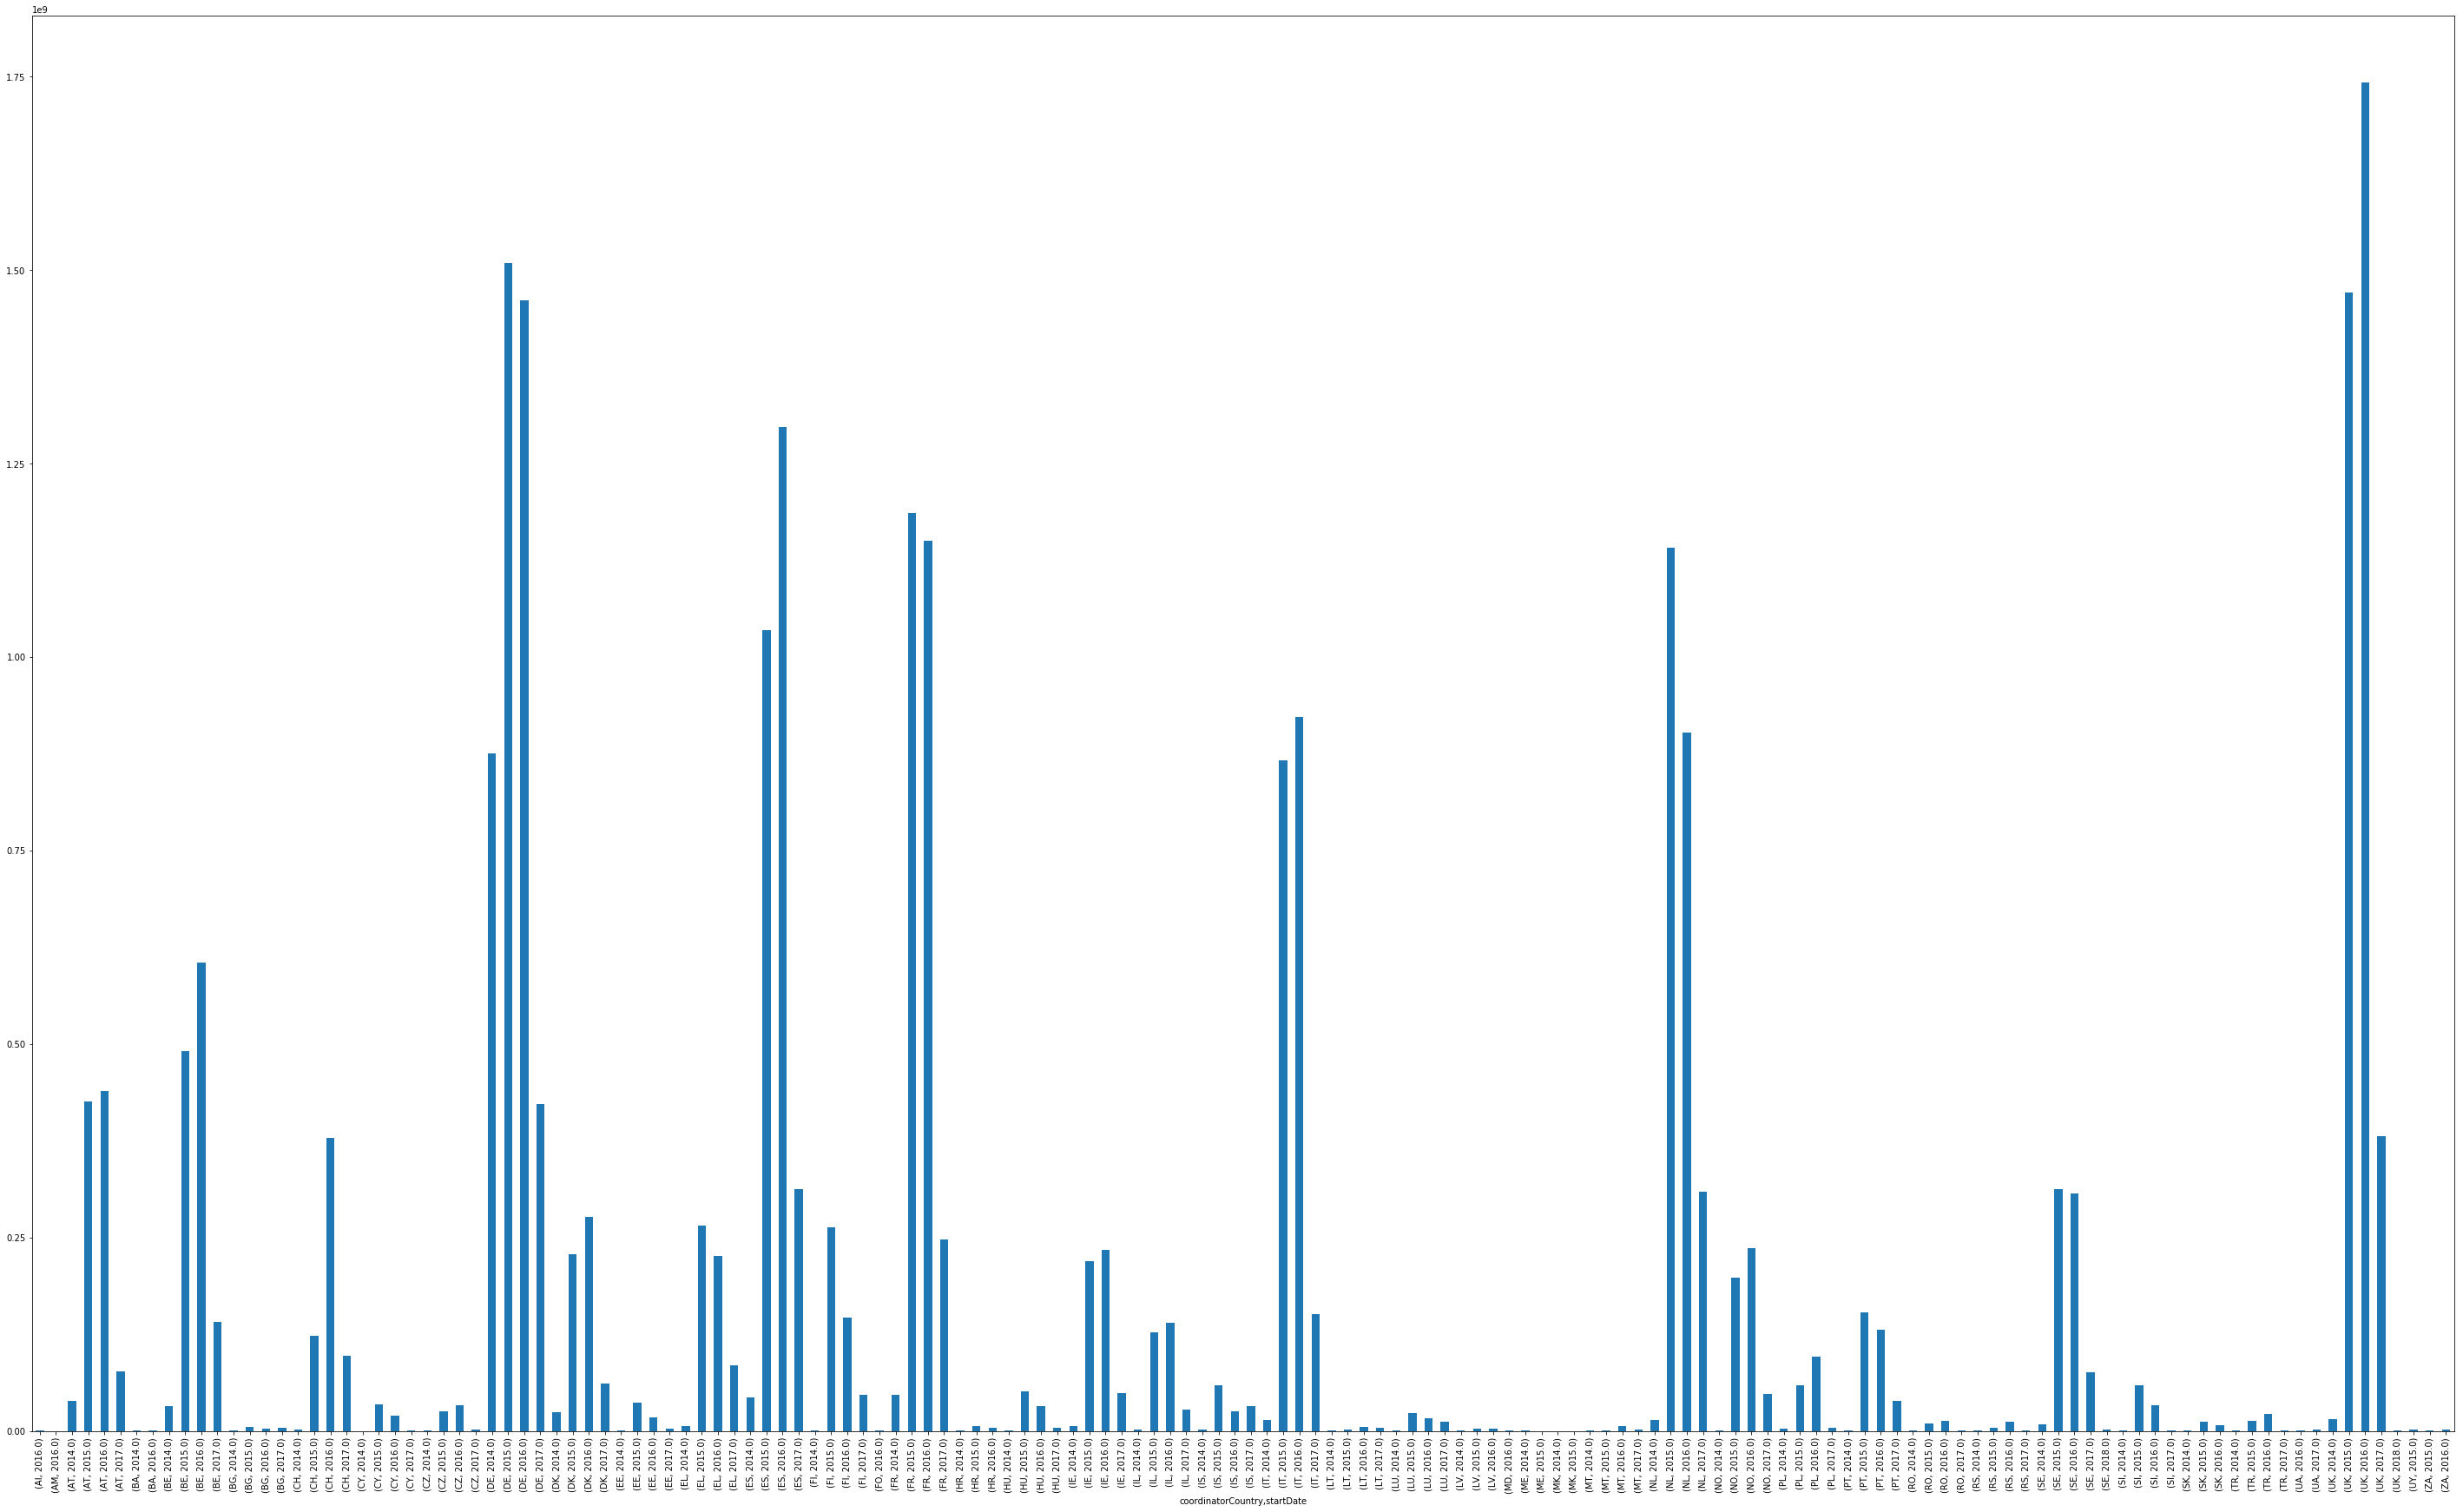

In [14]:
#grouping (attempt 1)

x = country_year_cost.groupby(['coordinatorCountry', 'startDate'])['totalCost'].sum()
x.plot.bar(figsize = (50,30))


In [15]:
n = country_year_cost.groupby(['coordinatorCountry', 'startDate']).count()
n

totalCost
coordinatorCountry startDate           
AI                 2016.0             1
AM                 2016.0             1
AT                 2014.0             8
                   2015.0           117
                   2016.0           122
                   2017.0            33
BA                 2014.0             1
                   2016.0             1
BE                 2014.0             8
                   2015.0           152
                   2016.0           163
                   2017.0            52
BG                 2014.0             2
                   2015.0             9
                   2016.0             5
                   2017.0             2
CH                 2014.0             3
                   2015.0            45
                   2016.0           156
                   2017.0            58
CY                 2014.0             1
                   2015.0            22
                   2016.0            18
                   2017.0             3
CZ                 2014.0             1
                   2015.0            20
                   2016.0            23
                   2017.0             5
DE                 2014.0            37
                   2015.0           569
...                                 ...
RS                 2014.0             4
                   2015.0             6
                   2016.0             9
                   2017.0             2
SE                 2014.0             8
                   2015.0           131
                   2016.0           118
                   2017.0            36
                   2018.0             1
SI                 2014.0             4
                   2015.0            33
                   2016.0            27
                   2017.0             1
SK                 2014.0             2
                   2015.0            11
                   2016.0            15
TR                 2014.0             6
                   2015.0            30
                   2016.0            27
                   2017.0             1
UA                 2016.0             3
                   2017.0             1
UK                 2014.0            47
                   2015.0           879
                   2016.0           995
                   2017.0           226
                   2018.0             1
UY                 2015.0             1
ZA                 2015.0             1
                   2016.0             1

[150 rows x 1 columns]

In [16]:
# Attempt 2
total_funds = country_year_cost.groupby(['coordinatorCountry', 'startDate']).sum()/1e9
total_funds

totalCost
coordinatorCountry startDate           
AI                 2016.0      0.000071
AM                 2016.0      0.000009
AT                 2014.0      0.038462
                   2015.0      0.425921
                   2016.0      0.439091
                   2017.0      0.076616
BA                 2014.0      0.000173
                   2016.0      0.000194
BE                 2014.0      0.032232
                   2015.0      0.490598
                   2016.0      0.604629
                   2017.0      0.140348
BG                 2014.0      0.000274
                   2015.0      0.004817
                   2016.0      0.002382
                   2017.0      0.003461
CH                 2014.0      0.001727
                   2015.0      0.122426
                   2016.0      0.378749
                   2017.0      0.097306
CY                 2014.0      0.000010
                   2015.0      0.034526
                   2016.0      0.019427
                   2017.0      0.000660
CZ                 2014.0      0.000087
                   2015.0      0.025665
                   2016.0      0.032802
                   2017.0      0.001334
DE                 2014.0      0.875441
                   2015.0      1.509586
...                                 ...
RS                 2014.0      0.000473
                   2015.0      0.003531
                   2016.0      0.011371
                   2017.0      0.000539
SE                 2014.0      0.008869
                   2015.0      0.311946
                   2016.0      0.306396
                   2017.0      0.075292
                   2018.0      0.001500
SI                 2014.0      0.000238
                   2015.0      0.058916
                   2016.0      0.033700
                   2017.0      0.000157
SK                 2014.0      0.000178
                   2015.0      0.011440
                   2016.0      0.007083
TR                 2014.0      0.000686
                   2015.0      0.013165
                   2016.0      0.021869
                   2017.0      0.000146
UA                 2016.0      0.000962
                   2017.0      0.001744
UK                 2014.0      0.014775
                   2015.0      1.470748
                   2016.0      1.742078
                   2017.0      0.380896
                   2018.0      0.000195
UY                 2015.0      0.001822
ZA                 2015.0      0.000623
                   2016.0      0.001631

[150 rows x 1 columns]

In [17]:
total_funds.reset_index(inplace=True)


In [36]:
# country vs cost
uk = total_funds[total_funds['coordinatorCountry']=='UK']
es = total_funds[total_funds['coordinatorCountry']=='ES']
fr = total_funds[total_funds['coordinatorCountry']=='FR']
ai = total_funds[total_funds['coordinatorCountry']=='AI']
am = total_funds[total_funds['coordinatorCountry']=='AM']
at = total_funds[total_funds['coordinatorCountry']=='AT']
ba = total_funds[total_funds['coordinatorCountry']=='BA']
be = total_funds[total_funds['coordinatorCountry']=='BE']
bg = total_funds[total_funds['coordinatorCountry']=='BG']
ch = total_funds[total_funds['coordinatorCountry']=='CH']
cy = total_funds[total_funds['coordinatorCountry']=='CY']
cz = total_funds[total_funds['coordinatorCountry']=='CZ']
de = total_funds[total_funds['coordinatorCountry']=='DE']
dk = total_funds[total_funds['coordinatorCountry']=='DK']
ee = total_funds[total_funds['coordinatorCountry']=='EE']
el = total_funds[total_funds['coordinatorCountry']=='EL']
fi = total_funds[total_funds['coordinatorCountry']=='FI']
fo = total_funds[total_funds['coordinatorCountry']=='FO']
hr = total_funds[total_funds['coordinatorCountry']=='HR']
hu = total_funds[total_funds['coordinatorCountry']=='HU']
ie = total_funds[total_funds['coordinatorCountry']=='IE']
il = total_funds[total_funds['coordinatorCountry']=='IL']
iss = total_funds[total_funds['coordinatorCountry']=='IS']
it = total_funds[total_funds['coordinatorCountry']=='IT']
lt = total_funds[total_funds['coordinatorCountry']=='LT']
lu = total_funds[total_funds['coordinatorCountry']=='LU']
lv = total_funds[total_funds['coordinatorCountry']=='LV']
md = total_funds[total_funds['coordinatorCountry']=='MD']
me = total_funds[total_funds['coordinatorCountry']=='ME']
mk = total_funds[total_funds['coordinatorCountry']=='MK']
mt = total_funds[total_funds['coordinatorCountry']=='MT']
nl = total_funds[total_funds['coordinatorCountry']=='NL']
no = total_funds[total_funds['coordinatorCountry']=='NO']
pl = total_funds[total_funds['coordinatorCountry']=='PL']
pt = total_funds[total_funds['coordinatorCountry']=='PT']
ro = total_funds[total_funds['coordinatorCountry']=='RO']
rs = total_funds[total_funds['coordinatorCountry']=='RS']
se = total_funds[total_funds['coordinatorCountry']=='SE']
si = total_funds[total_funds['coordinatorCountry']=='SI']
sk = total_funds[total_funds['coordinatorCountry']=='SK']
tr = total_funds[total_funds['coordinatorCountry']=='TR']
ua = total_funds[total_funds['coordinatorCountry']=='UA']
uy = total_funds[total_funds['coordinatorCountry']=='UY']
za = total_funds[total_funds['coordinatorCountry']=='ZA']






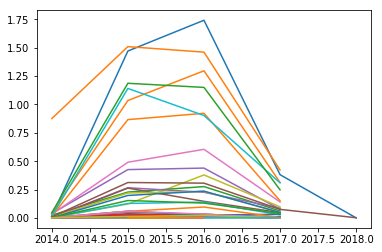

In [41]:
# funding per country through years --> fix x axis markings / remove 2018 "!=2018"

plt.plot(uk['startDate'], uk['totalCost'])
plt.plot(es['startDate'], es['totalCost'])
plt.plot(ai['startDate'], ai['totalCost'])
plt.plot(am['startDate'], am['totalCost'])
plt.plot(at['startDate'], at['totalCost'])
plt.plot(ba['startDate'], ba['totalCost'])
plt.plot(be['startDate'], be['totalCost'])
plt.plot(bg['startDate'], bg['totalCost'])
plt.plot(ch['startDate'], ch['totalCost'])
plt.plot(cy['startDate'], cy['totalCost'])
plt.plot(cz['startDate'], cz['totalCost'])
plt.plot(de['startDate'], de['totalCost'])
plt.plot(dk['startDate'], dk['totalCost'])
plt.plot(ee['startDate'], ee['totalCost'])
plt.plot(el['startDate'], el['totalCost'])
plt.plot(fi['startDate'], fi['totalCost'])
plt.plot(hr['startDate'], hr['totalCost'])
plt.plot(hu['startDate'], hu['totalCost'])
plt.plot(ie['startDate'], ie['totalCost'])
plt.plot(il['startDate'], il['totalCost'])
plt.plot(iss['startDate'], iss['totalCost'])
plt.plot(it['startDate'], it['totalCost'])
plt.plot(lt['startDate'], lt['totalCost'])
plt.plot(lu['startDate'], lu['totalCost'])
plt.plot(lv['startDate'], lv['totalCost'])
plt.plot(md['startDate'], md['totalCost'])
plt.plot(me['startDate'], me['totalCost'])
plt.plot(mk['startDate'], mk['totalCost'])
plt.plot(mt['startDate'], mt['totalCost'])
plt.plot(nl['startDate'], nl['totalCost'])
plt.plot(no['startDate'], no['totalCost'])
plt.plot(pl['startDate'], pl['totalCost'])
plt.plot(pt['startDate'], pt['totalCost'])
plt.plot(ro['startDate'], ro['totalCost'])
plt.plot(rs['startDate'], rs['totalCost'])
plt.plot(se['startDate'], se['totalCost'])
plt.plot(si['startDate'], si['totalCost'])
plt.plot(sk['startDate'], sk['totalCost'])
plt.plot(tr['startDate'], tr['totalCost'])
plt.plot(ua['startDate'], ua['totalCost'])
plt.plot(uy['startDate'], uy['totalCost'])
plt.plot(za['startDate'], za['totalCost'])
plt.plot(fr['startDate'], fr['totalCost'])

plt.plot(figsize = (40,6))
# plt.xlim(2014, 2017)




plt.show()


### SELECT TOP COUNTRIES FUNDING PER YEAR

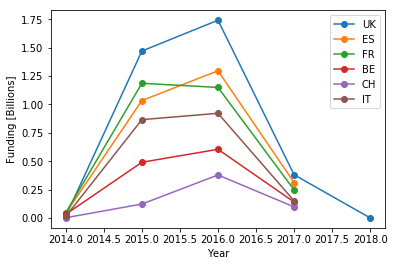

In [42]:
plt.figure(2)
plt.plot(uk['startDate'], uk['totalCost'], marker ='o', label='UK')
plt.plot(es['startDate'], es['totalCost'], marker ='o', label='ES')
plt.plot(fr['startDate'], fr['totalCost'], marker ='o',  label='FR')
plt.plot(be['startDate'], be['totalCost'], marker ='o', label='BE')
plt.plot(ch['startDate'], ch['totalCost'], marker ='o', label = 'CH')
plt.plot(it['startDate'], it['totalCost'], marker ='o', label = 'IT')
plt.legend()

plt.ylabel("Funding [Billions]")
plt.xlabel("Year") 
plt.show()




# plt.xlim(2014, 2017)

## Project count per year

In [22]:
# How many projects were started in each year

[len(clean_up[clean_up['startDate'] == 2014]) , len(clean_up[clean_up['startDate'] == 2015]) ,
len(clean_up[clean_up['startDate'] == 2016]), len(clean_up[clean_up['startDate'] == 2017]), 
len(clean_up[clean_up['startDate'] == 2018])]



[367, 4690, 4892, 1099, 2]

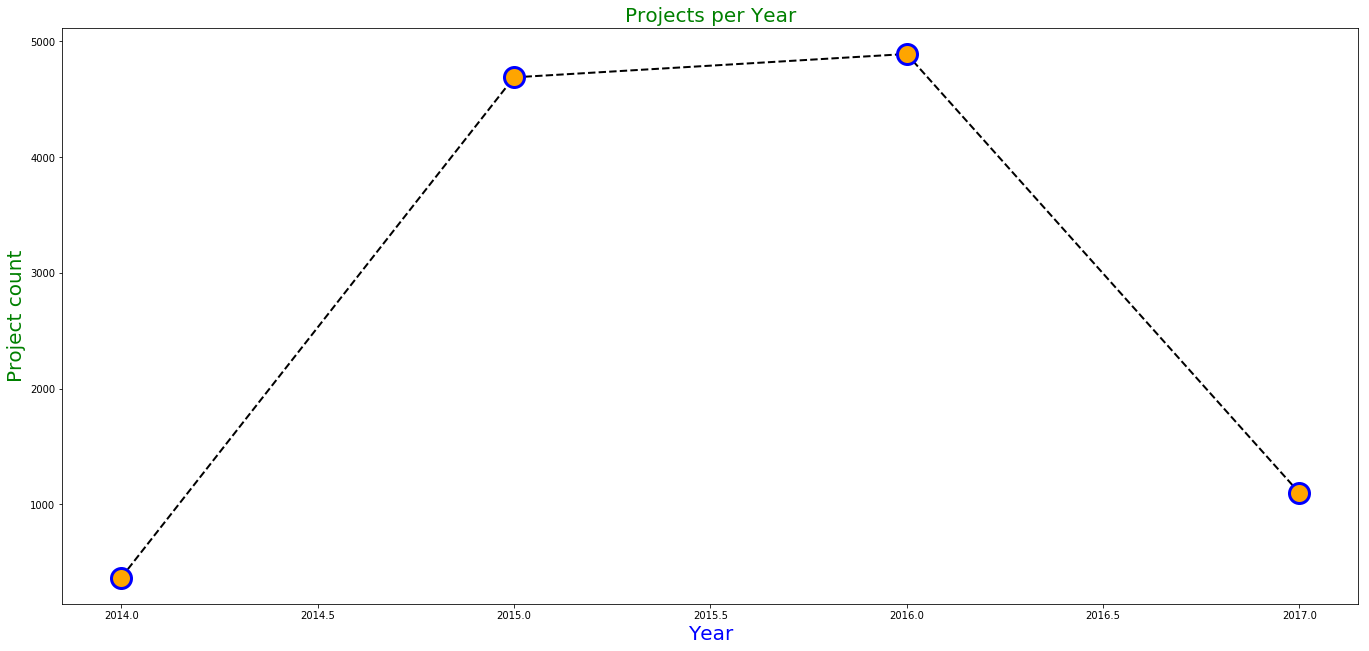

In [23]:
#  Number of projects per year

fig = plt.figure()

ax = fig.add_axes([0,0,3,2])
y1 = (367,4690,4892,1099)
x = (2014, 2015, 2016, 2017)

ax.plot(x,y1, color = 'black', linewidth=2,linestyle = '--',
        marker='o', markersize= 20,
        markerfacecolor='orange', markeredgewidth =3,
       markeredgecolor = 'blue')

ax.set_xlabel('Year', color='b', size = 20)
ax.set_ylabel('Project count', color='g', size = 20)
ax.set_title('Projects per Year', color = 'g', size = 20)


## Country /  Topic specialisation

In [24]:
# example use croatia

croatia = clean_up[clean_up['coordinatorCountry'] =='HR']
croatia.top_topic

1286                 tc_generic_terminology
2058                            tc_genetics
2131                              tc_energy
2698                                tc_smes
3377                 tc_generic_terminology
3548    tc_manufacturing_process_efficiency
4153                            tc_genetics
4419                 tc_generic_terminology
4804    tc_manufacturing_process_efficiency
5276                                tc_smes
5431    tc_manufacturing_process_efficiency
5536    tc_manufacturing_process_efficiency
5571                 tc_generic_terminology
5628                 tc_generic_terminology
5961                 tc_generic_terminology
6196                 tc_generic_terminology
Name: top_topic, dtype: object

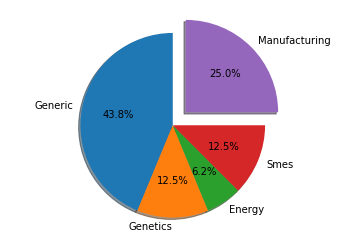

In [25]:
name = 'Generic', 'Genetics', 'Energy', 'Smes', 'Manufacturing' 
number = [7, 2, 1, 2, 4]

explode = (0, 0, 0, 0, 0.2)

fig2, ax2 = plt.subplots()
ax2.pie(number, labels=name, autopct = '%1.1f%%', explode=explode, 
        shadow =True, startangle=90)

ax2.axis('equal')

plt.show()

# UK SPECIFIC TOPICS

In [26]:
# unique uk topics

uk = clean_up[clean_up['coordinatorCountry']=='UK']
set(uk.top_topic)

{'tc_aircraft',
 'tc_bio_chemistry',
 'tc_biology_evolutionary',
 'tc_climate_marine',
 'tc_computational_methods',
 'tc_culture_development',
 'tc_data',
 'tc_energy',
 'tc_generic_academic_activities',
 'tc_generic_terminology',
 'tc_genetics',
 'tc_health_tech',
 'tc_heritage',
 'tc_history',
 'tc_industrial_internet',
 'tc_infrastructure',
 'tc_manufacturing_process_efficiency',
 'tc_materials',
 'tc_medical',
 'tc_nanotech',
 'tc_neuroscience_cognitive_science',
 'tc_recycling',
 'tc_robotics',
 'tc_smes',
 'tc_social_policy',
 'tc_soil',
 'tc_transport'}

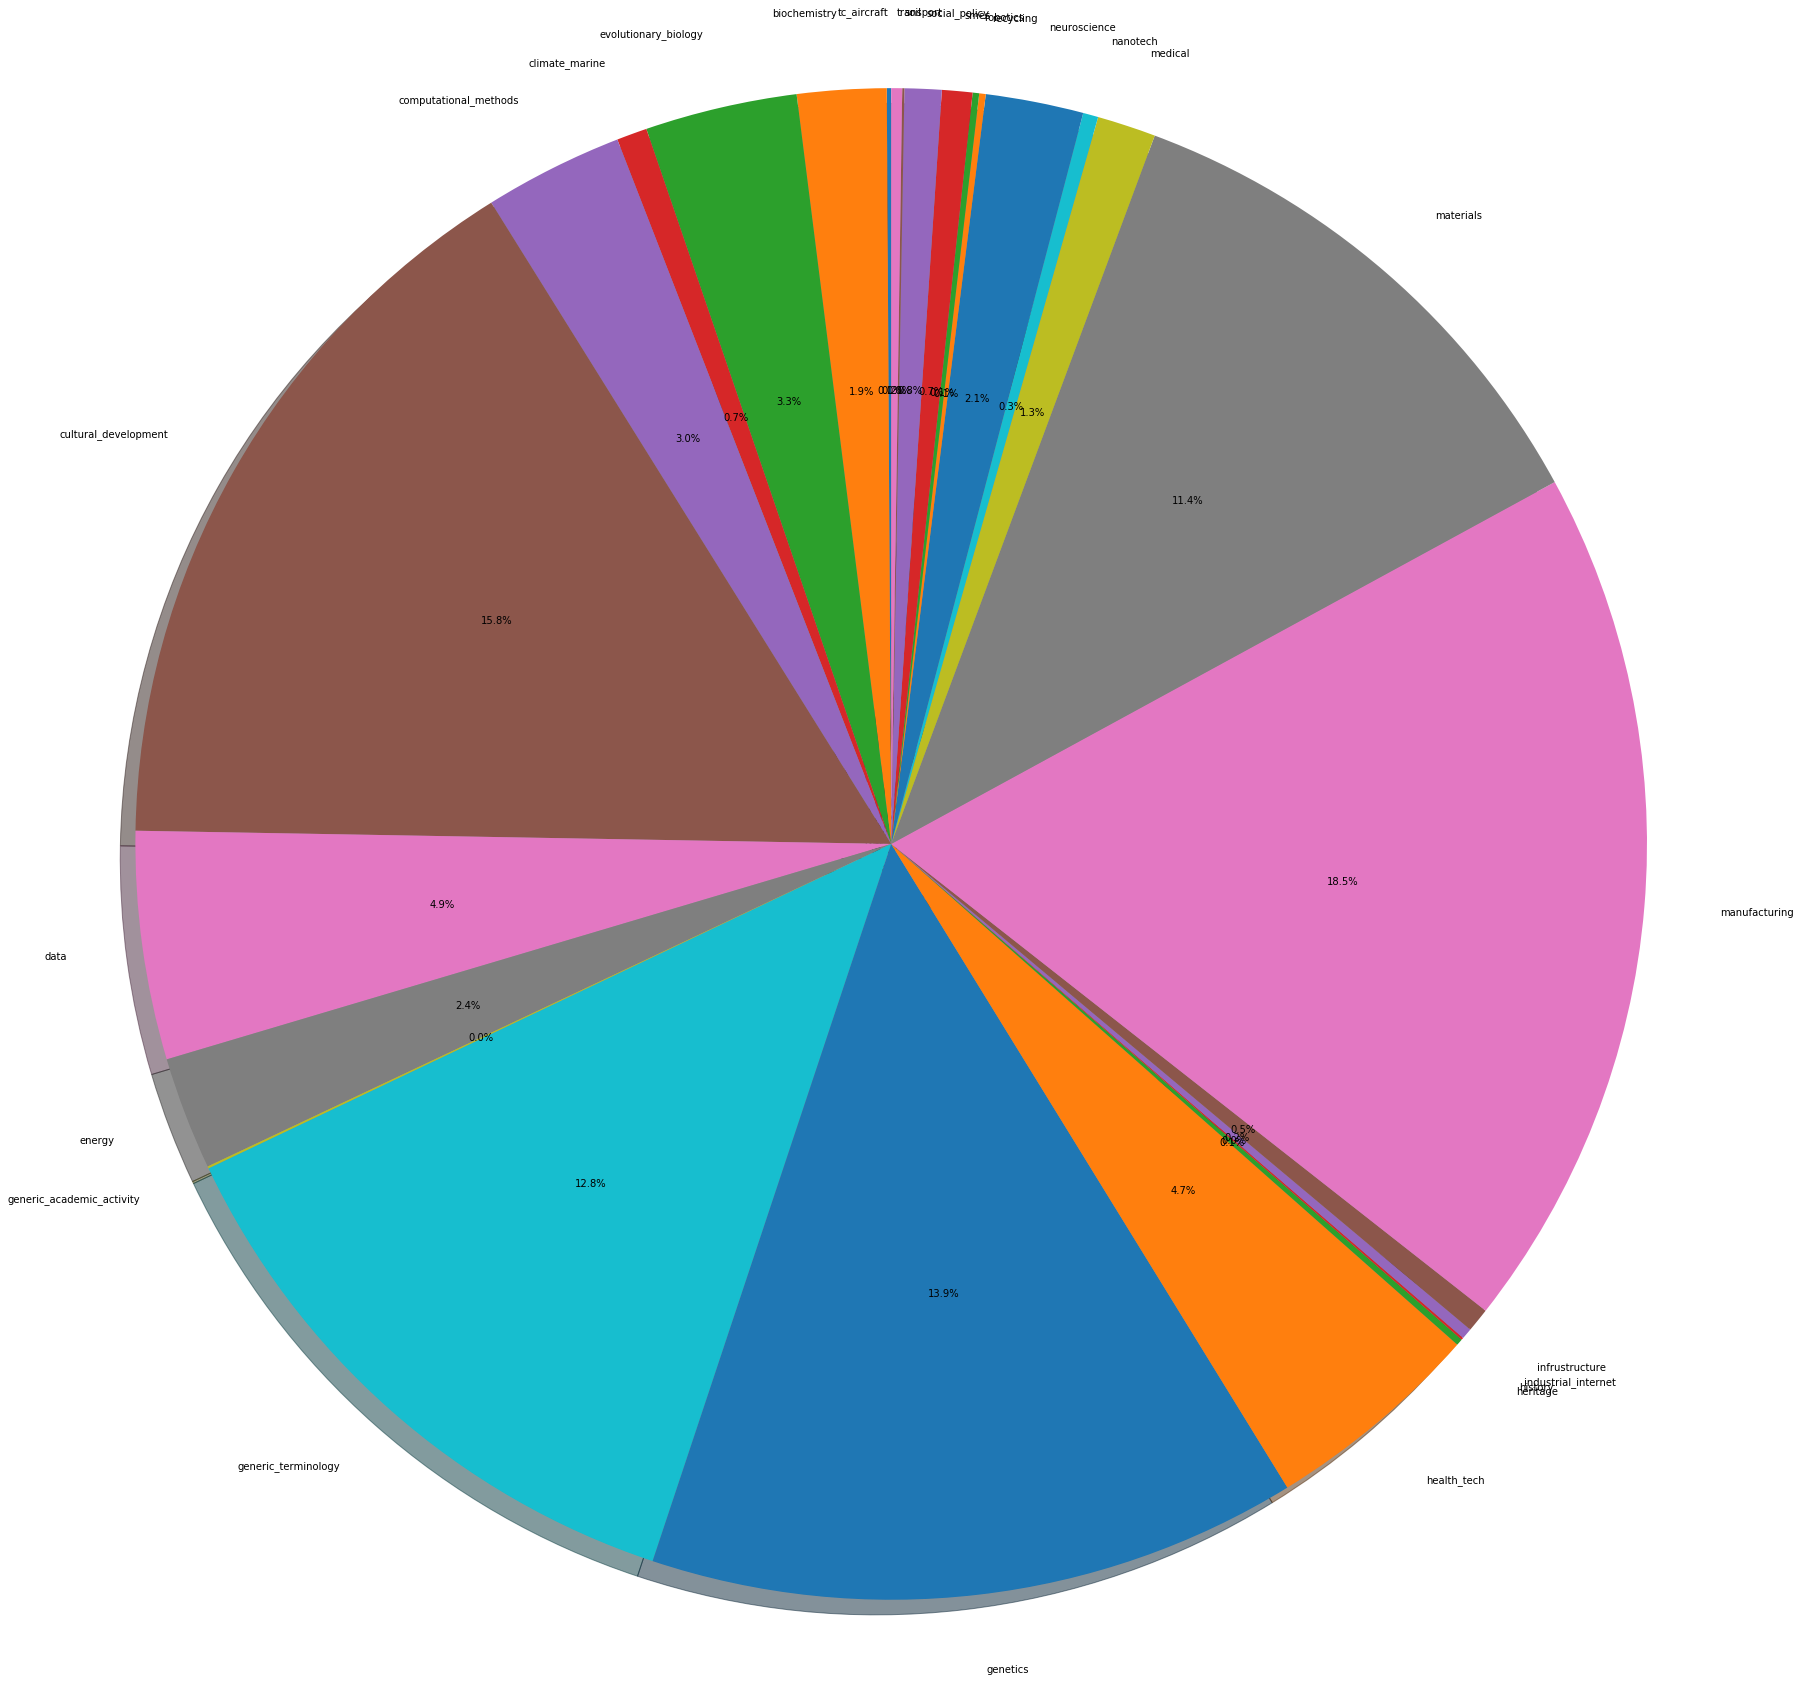

In [27]:
name = 'tc_aircraft', 'biochemistry', 'evolutionary_biology', 'climate_marine', 'computational_methods', 'cultural_development', 'data', 'energy', 'generic_academic_activity', 'generic_terminology','genetics', 'health_tech', 'heritage', 'history', 'industrial_internet', 'infrustructure', 'manufacturing','materials', 'medical', 'nanotech', 'neuroscience', 'recycling', 'robotics', 'smes', 'social_policy', 'soil', 'transport'
        
number = [2, 41, 70, 14, 64, 341, 105, 52, 1, 276, 299, 101, 3, 1, 5, 11, 399, 245, 27, 7, 45, 3, 3, 14, 17, 1, 5]

# explode = (0, 0, 0, 0, 0.2)

fig2, ax2 = plt.subplots(figsize=(30,30))
ax2.pie(number, labels=name, autopct = '%1.1f%%',  
        shadow =True, startangle=90)

ax2.axis('equal')

plt.show()

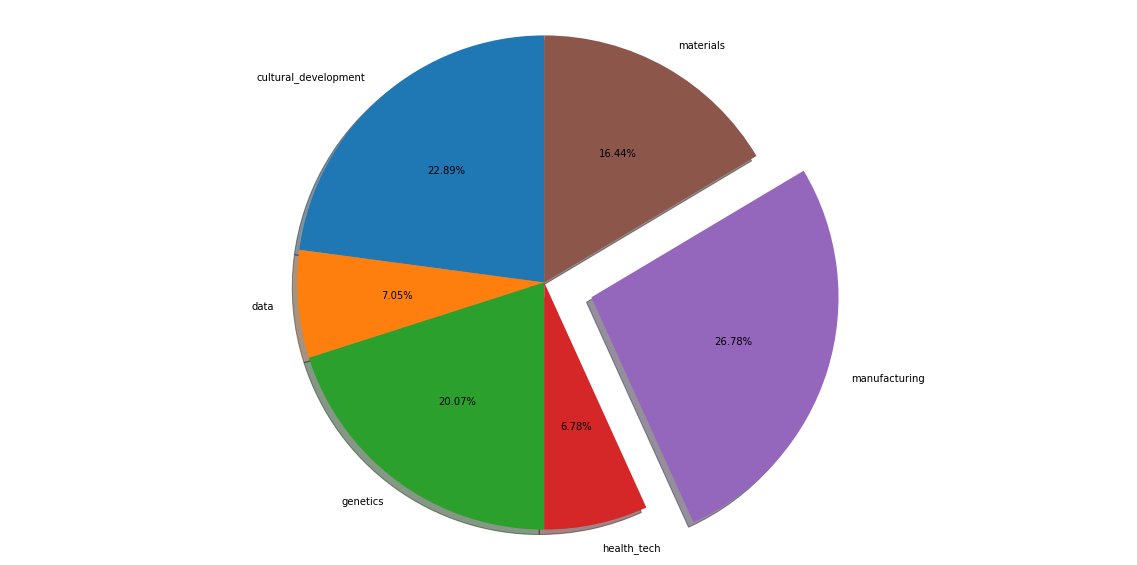

In [28]:
#top topics for the UK

name = 'cultural_development', 'data','genetics', 'health_tech', 'manufacturing','materials'
        
number = [341, 105, 299, 101, 399, 245]

explode = (0, 0, 0, 0, 0.2, 0)


fig2, ax2 = plt.subplots(figsize=(20,10))
ax2.pie(number, labels=name, autopct = '%1.2f%%', explode=explode, 
        shadow =True, startangle=90)

ax2.axis('equal')

plt.show()
plt.savefig('uk_pie.png')